# Demo of LRISb multi-slit 600 grism

In [1]:
# imports
import os
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt

from pypeit import pypeit
from pypeit.spectrographs import util as spec_util
from pypeit import ginga
from pypeit import reduce

## A few basics

In [2]:
spectro_name = 'keck_lris_blue'
spectrograph = spec_util.load_spectrograph(spectro_name)

In [3]:
if not os.path.isdir('TMP'):
    os.mkdir('TMP')

# Setup
    Leaving this for a separate Notebook/discussion

# Running

## PypeIt class

### PypeIt file

In [4]:
pypeit_file = os.path.join(os.getenv('PYPEIT_DEV'), 'REDUX_OUT', 'Keck_LRIS_blue', 'multi_600_4000_d560', 'keck_lris_blue_multi_600_4000_d560.pypeit')
pypeit_file

'/home/xavier/local/Python/PypeIt-development-suite/REDUX_OUT/Keck_LRIS_blue/multi_600_4000_d560/keck_lris_blue_multi_600_4000_d560.pypeit'

### Instantiate

In [5]:
pypeIt = pypeit.PypeIt(pypeit_file, redux_path='./TMP', 
                                   verbosity=2, overwrite=True, logname='tmp.log', show=False)

[INFO]    :: util.py 483 parse_pypeit_file() - Loading the reduction file
[INFO]    :: util.py 509 parse_pypeit_file() - Found 12 raw data frames
[INFO]    :: util.py 530 parse_pypeit_file() - Input file loaded successfully
[WARNING] :: metadata.py 1219 get_frame_types() - Removing existing frametype and framebit columns.
[INFO]    :: metadata.py 1230 get_frame_types() - Typing files
[INFO]    :: metadata.py 1237 get_frame_types() - Using user-provided frame types.
[INFO]    :: pypeit.py 122 __init__() - Setting reduction path to ./TMP
[INFO]    :: paths.py 38 make_dirs() - Creating Science directory
[INFO]    :: paths.py 41 make_dirs() - The following directory already exists:
             ./TMP/Science
[INFO]    :: paths.py 65 make_dirs() - Creating Object directories
[INFO]    :: paths.py 68 make_dirs() - Creating Master Calibrations directory
[INFO]    :: paths.py 72 make_dirs() - The following directory already exists:
             ./TMP/MF_keck_lris_blue
[INFO]    :: paths.py 89 

In [6]:
pypeIt

<PypeIt: pypeit_file=/home/xavier/local/Python/PypeIt-development-suite/REDUX_OUT/Keck_LRIS_blue/multi_600_4000_d560/keck_lris_blue_multi_600_4000_d560.pypeit>

### View a few things

#### Meta data

In [7]:
pypeIt.fitstbl

ra,dec,target,decker,binning,mjd,exptime,airmass,dichroic,hatch,dispangle,lampstat01,lampstat02,lampstat03,lampstat04,lampstat05,lampstat06,lampstat07,lampstat08,lampstat09,lampstat10,lampstat11,lampstat12,dispname,directory,filename,comb_id,bkg_id,setup,calib,frametype,framebit,calibbit
str11,str11,object,object,object,float64,object,float64,object,str6,object,str3,str3,str3,str3,str3,str3,str3,str3,str3,str3,str3,str3,object,str94,object,int64,int64,object,object,str9,int16,int64
15:20:00.00,+00:00:00.0,unknown,c17_60L.,"2,2",57832.0404,1.0,13.37481353,560,closed,22.13431168,on,on,on,on,on,on,on,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2022.fits.gz,-1,-1,A,0,arc,1,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.134188,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2042.fits.gz,-1,-1,A,0,bias,2,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.134619,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2043.fits.gz,-1,-1,A,0,bias,2,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.135051,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2044.fits.gz,-1,-1,A,0,bias,2,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.135481,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2045.fits.gz,-1,-1,A,0,bias,2,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.135907,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2046.fits.gz,-1,-1,A,0,bias,2,1
04:42:31.03,+25:40:00.0,Blank04 25,c17_60L.,"2,2",57832.202557,12.0,1.08821422,560,open,26.98307037,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2058.fits.gz,-1,-1,A,0,trace,128,1
10:01:24.75,+02:11:54.5,c17_60L.,c17_60L.,"2,2",57832.245558,1800.0,1.35503989,560,open,22.13995552,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2083.fits.gz,1,-1,A,0,science,32,1
10:01:24.75,+02:11:54.5,c17_60L.,c17_60L.,"2,2",57832.266836,1800.0,1.23253324,560,open,22.13995552,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2084.fits.gz,2,-1,A,0,science,32,1


#### Custom parmeters (from LRIS Spectrograph class and the PypeIt file)

In [8]:
pypeIt.par['calibrations']['flatfield']

Parameter            Value                                                                                                      Default    Type        Callable
---------------------------------------------------------------------------------------------------------------------------------------------------------------
method               bspline                                                                                                    bspline    str         False   
frame                /home/xavier/local/Python/PypeIt-development-suite/CALIBS/PYPEIT_LRISb_pixflat_B600_2x2_17sep2009.fits.gz  pixelflat  str         False   
illumflatten         True                                                                                                       True       bool        False   
spec_samp_fine       1.2                                                                                                        1.2        int, float  False   
spec_samp_coarse     50.0               

In [9]:
pypeIt.par['calibrations']['wavelengths']

Parameter         Value                              Default        Type                       Callable
-------------------------------------------------------------------------------------------------------
reference         arc                                arc            str                        False   
method            full_template                      holy-grail     str                        False   
echelle           False                              False          bool                       False   
ech_fix_format    True                               True           bool                       False   
ech_nspec_coeff   4                                  4              int                        False   
ech_norder_coeff  4                                  4              int                        False   
ech_sigrej        2.0                                2.0            int, float                 False   
lamps             NeI, ArI, CdI, KrI, XeI, ZnI, HgI  None       

## Work on one frame and one detector

### Find all the science frames

In [10]:
sci_frames = pypeIt.fitstbl.find_frames('science')
np.where(sci_frames)[0]

array([ 7,  8,  9, 10, 11])

### Set ours

In [11]:
frame = 7
pypeIt.det = 1

## Calibrate

In [12]:
pypeIt.caliBrate.set_config(frame, pypeIt.det, pypeIt.par['calibrations'])
pypeIt.caliBrate

<MultiSlitCalibrations: frame=7, det=1, calib_ID=0>

### Steps

In [13]:
steps = pypeIt.caliBrate.default_steps()
steps

['bpm', 'bias', 'arc', 'slits', 'wv_calib', 'tilts', 'flats', 'wave']

### BPM

In [14]:
pypeIt.caliBrate.get_bpm()

[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 502 bpm() - Using hard-coded BPM for det=1 on LRISb


array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int8)

### Bias

In [15]:
pypeIt.caliBrate.get_bias()

[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2042.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2042.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2042.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2043.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2043.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-developme

array([[306.40822269, 308.60427844, 308.41269626, ..., 445.20287521,
        449.40738351, 443.80333613],
       [681.00528702, 679.        , 683.20216574, ..., 785.        ,
        782.80751259, 782.        ],
       [793.80085675, 795.00427817, 795.        , ..., 887.80256794,
        889.00427467, 887.00428431],
       ...,
       [838.60062013, 841.80508688, 840.40395271, ..., 929.60142008,
        930.60098834, 929.00172176],
       [838.80248125, 838.20557778, 839.8096261 , ..., 931.00558542,
        931.00644644, 926.60120855],
       [838.80081078, 842.20104504, 841.        , ..., 929.40142051,
        930.40163367, 928.40400798]])

In [16]:
ginga.show_image(pypeIt.caliBrate.msbias)

(<ginga.util.grc.RemoteClient at 0x7fa6e447a2b0>,
 <ginga.util.grc._channel_proxy at 0x7fa6e447ac50>)

### Arc

In [17]:
pypeIt.caliBrate.get_arc()

[INFO]    :: calibrations.py 251 get_arc() - Preparing a master arc frame
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: processimages.py 4

array([[ -0.40822269,   6.39572156,   7.58730374, ...,  31.79712479,
         29.59261649,  -7.80333613],
       [ -2.00528702,   8.        ,   4.79783426, ...,  42.        ,
         35.19248741,  -6.        ],
       [ -1.80085675,   5.99572183,   6.        , ...,  43.19743206,
         32.99572533, -10.00428431],
       ...,
       [ -4.60062013,   2.19491312,   8.59604729, ...,  30.39857992,
         27.39901166,  -7.00172176],
       [ -4.80248125,   7.79442222,   8.1903739 , ...,  30.99441458,
         27.99355356, -10.60120855],
       [ -2.80081078,   1.79895496,   4.        , ...,  26.59857949,
         22.59836633, -11.40400798]])

In [18]:
ginga.show_image(pypeIt.caliBrate.msarc)
#pypeIt.caliBrate.arcImage.show()

(<ginga.util.grc.RemoteClient at 0x7fa6e4343588>,
 <ginga.util.grc._channel_proxy at 0x7fa72a299208>)

### Slit definition

In [19]:
_ = pypeIt.caliBrate.get_slits()

[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: processimages.py 413 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: processim

In [20]:
# Show
pypeIt.caliBrate.traceSlits.show('edges')

### Wave calib

In [21]:
_ = pypeIt.caliBrate.get_wv_calib()

[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 0
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 1
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 2
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 3
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 4
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 5
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 6
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 7
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 8
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spe

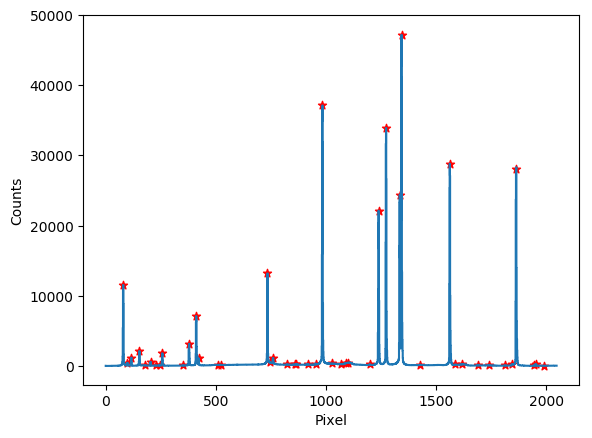

In [22]:
pypeIt.caliBrate.waveCalib.show('spec', slit=10)

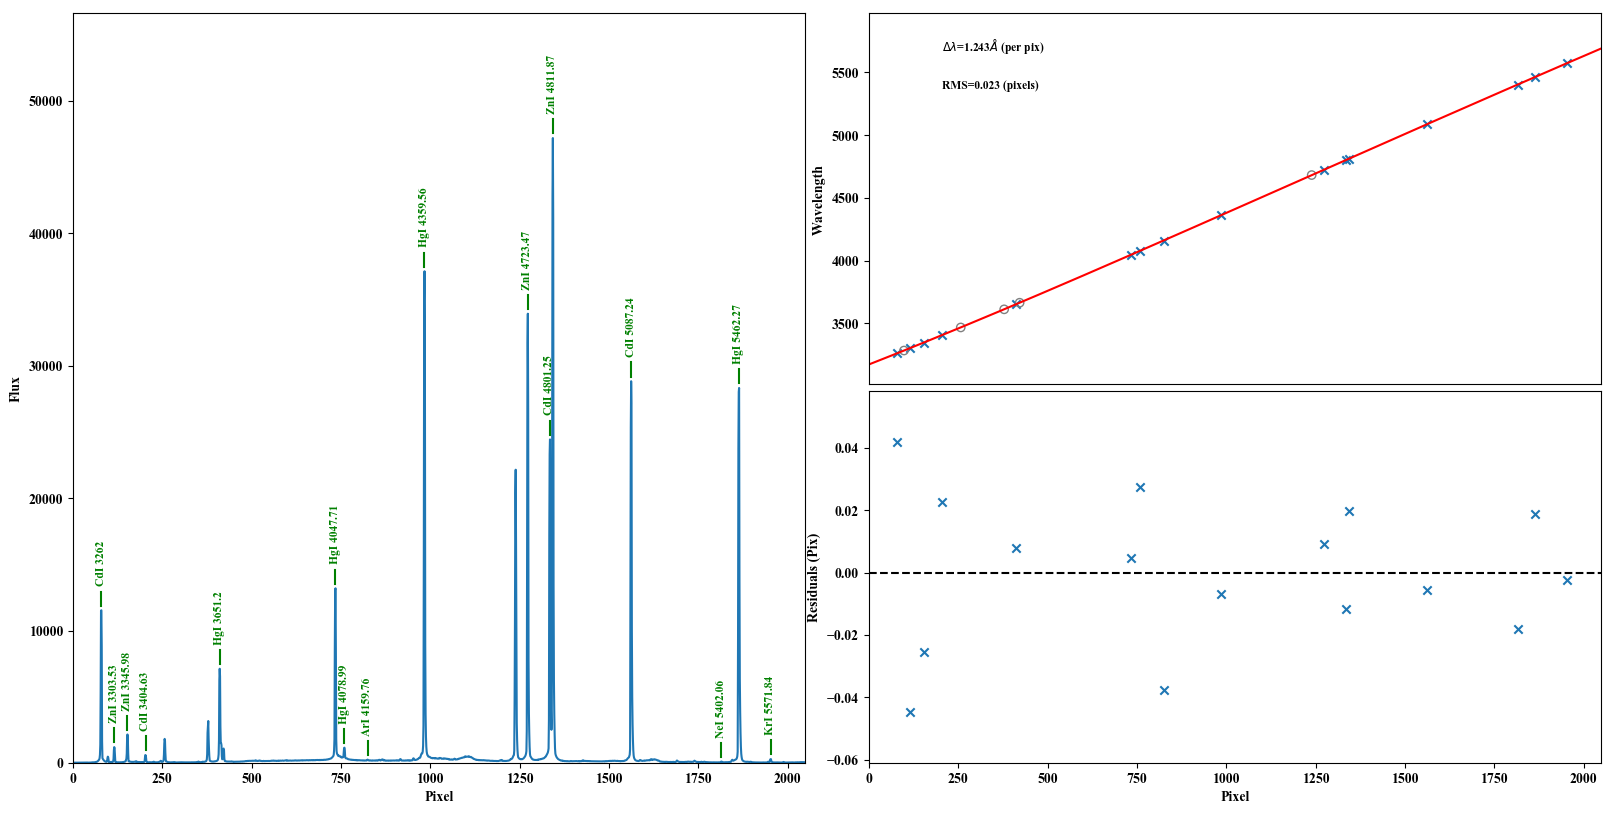

In [23]:
pypeIt.caliBrate.waveCalib.show('fit', slit=10)

### Tilts
    See PNGs for QA

In [24]:
_ = pypeIt.caliBrate.get_tilts()  # ~3 min

[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 0
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 1
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 2
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 3
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 4
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 5
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 6
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 7
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 8
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spe

[INFO]    :: tracewave.py 586 fit_tilts() - Rejected 0/109568 pixels in final inversion tilts image fit
[INFO]    :: wavetilts.py 303 run() - Computing tilts for slit 5/13
[INFO]    :: tracewave.py 80 tilts_find_lines() - Modelling arc line tilts with 22 arc lines
[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 21/22
[INFO]    :: tracewave.py 452 trace_tilts() - PCA modeling 21 good tilts
[INFO]    :: extract.py 1920 pca_trace() - Truncated PCA with npca=1 components contains 71.596% of the total variance.
[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 20/22
[INFO]    :: tracewave.py 518 fit_tilts() - Fitting tilts with a low order, 2D legendre2d
[INFO]    :: tracewave.py 546 fit_tilts() - Residuals: 2D Legendre Fit
[INFO]    :: tracewave.py 547 fit_tilts() - RMS (pixels): 0.044538722600813305
[INFO]    :: tracewave.py 548 fit_tilts() - RMS/FWHM: 0.011134680650203326
[INFO]    :: tracewave.py 550 fit_til

[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 20/20
[INFO]    :: tracewave.py 452 trace_tilts() - PCA modeling 20 good tilts
[INFO]    :: extract.py 1920 pca_trace() - Truncated PCA with npca=1 components contains 88.275% of the total variance.
[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 20/20
[INFO]    :: tracewave.py 518 fit_tilts() - Fitting tilts with a low order, 2D legendre2d
[INFO]    :: tracewave.py 546 fit_tilts() - Residuals: 2D Legendre Fit
[INFO]    :: tracewave.py 547 fit_tilts() - RMS (pixels): 0.04099551087229153
[INFO]    :: tracewave.py 548 fit_tilts() - RMS/FWHM: 0.010248877718072882
[INFO]    :: tracewave.py 550 fit_tilts() - Inverting the fit to generate the tilts image
[INFO]    :: tracewave.py 586 fit_tilts() - Rejected 0/97138 pixels in final inversion tilts image fit
[INFO]    :: wavetilts.py 303 run() - Computing tilts for slit 12/13
[INFO]    :: tracewave.py 80 tilts_find_l

### Flats

In [25]:
_ = pypeIt.caliBrate.get_flats()

[INFO]    :: calibrations.py 446 get_flats() - Found user-defined file: /home/xavier/local/Python/PypeIt-development-suite/CALIBS/PYPEIT_LRISb_pixflat_B600_2x2_17sep2009.fits.gz
[INFO]    :: masterframe.py 111 load_master() - Loading a pre-existing master calibration frame of type: pixelflat from filename: /home/xavier/local/Python/PypeIt-development-suite/CALIBS/PYPEIT_LRISb_pixflat_B600_2x2_17sep2009.fits.gz
[WARNING] :: masterframe.py 108 load_master() - No Master frame found of type pixelflat: ./TMP/MF_keck_lris_blue/MasterIllumFlat_A_1_01.fits
[WARNING] :: flatfield.py 184 load_master_illumflat() - No Master frame found of type illumflat: ./TMP/MF_keck_lris_blue/MasterIllumFlat_A_1_01.fits
[WARNING] :: calibrations.py 499 get_flats() - You are not illumination flat fielding your data!


### Wavelength Image

In [26]:
_ = pypeIt.caliBrate.get_wave()

[INFO]    :: masterframe.py 151 save_master() - Saving master wave frame as:
             ./TMP/MF_keck_lris_blue/MasterWave_A_1_01.fits
[INFO]    :: masterframe.py 165 save_master() - Writing header information
[WARNING] :: masterframe.py 176 save_master() - Overwriting file:
             ./TMP/MF_keck_lris_blue/MasterWave_A_1_01.fits
[INFO]    :: masterframe.py 181 save_master() - Master wave frame saved successfully:
             ./TMP/MF_keck_lris_blue/MasterWave_A_1_01.fits


In [27]:
pypeIt.caliBrate.waveImage.show()

## Extraction

### The following ~8 steps could all be done with one call to pypeIt.extract_one(frames, det)

### Setup

In [28]:
frames = [frame]

In [29]:
pypeIt.prep_extract(frames, pypeIt.det)
pypeIt.sciI

<ScienceImage: nimg=1>

### Process Images

In [30]:
pypeIt.sciimg, pypeIt.sciivar, pypeIt.rn2img, pypeIt.mask, pypeIt.crmask  = pypeIt.sciI.proc(
    pypeIt.caliBrate.msbias, pypeIt.caliBrate.mspixflatnrm, 
    pypeIt.caliBrate.msbpm, illum_flat=pypeIt.caliBrate.msillumflat, show=True)

[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 763 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: processimages.py 413 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: processim

### Reduce class

In [31]:
pypeIt.redux = reduce.instantiate_me(pypeIt.spectrograph, pypeIt.caliBrate.tslits_dict, pypeIt.mask,
                                           par=pypeIt.par['scienceimage'],
                                           frame_par=pypeIt.par['scienceframe'],
                                           objtype=pypeIt.objtype, det=pypeIt.det, binning=pypeIt.binning)

### Find objects (Round 1)

In [32]:
# Object finding, first pass on frame without sky subtraction (mainly to find bright ones and mask them)
maskslits = pypeIt.caliBrate.maskslits.copy()
_, _, skymask_init = pypeIt.redux.find_objects(pypeIt.sciI.sciimg, pypeIt.sciivar,
                                               maskslits=maskslits, show=True)

[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 0
[WARNING] :: extract.py 1545 objfind() - Discarding 1 at spatial pixels spat = [-1.] which land within trim_edg = (left, right) = (5, 5) pixels from the slit boundary for this nsamp = 81.00 wide slit
[WARNING] :: extract.py 1546 objfind() - You must decrease from the current value of trim_edg in order to keep them
[WARNING] :: extract.py 1547 objfind() - Such edge objects are often spurious
[WARNING] :: extract.py 1556 objfind() - Requested nperslit = 10 most significant objects but only npeak = 6 were found. Returning all the objects found.
[INFO]    :: extract.py 1572 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.40
[INFO]    :: extract.py 1578 objfind() - Object finding threshold of:  3.98
[INFO]    :: extract.py 1687 objfind() - No objects found
[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 1
[WARNING] :: extract.py 1545 objfind() - Discarding 

[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 12
[WARNING] :: extract.py 1556 objfind() - Requested nperslit = 10 most significant objects but only npeak = 3 were found. Returning all the objects found.
[INFO]    :: extract.py 1572 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.01
[INFO]    :: extract.py 1578 objfind() - Object finding threshold of:  0.10
[INFO]    :: extract.py 1692 objfind() - Fitting the object traces
[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 13
[WARNING] :: extract.py 1556 objfind() - Requested nperslit = 10 most significant objects but only npeak = 6 were found. Returning all the objects found.
[INFO]    :: extract.py 1572 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.03
[INFO]    :: extract.py 1578 objfind() - Object finding threshold of:  0.29
[INFO]    :: extract.py 1692 objfind() - Fitting the object traces


### Global sky sub

In [33]:
initial_sky = pypeIt.redux.global_skysub(pypeIt.sciimg, pypeIt.sciivar, pypeIt.caliBrate.tilts_dict['tilts'], 
                                         skymask=skymask_init,
                                     maskslits=maskslits, show=True)

[INFO]    :: reduce.py 241 global_skysub() - Global sky subtraction for slit: 0
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=152203 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.002    13285        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.002, rejected =   13285, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=161099 good pixels
[INFO]    :: utils.py 470 bspline_p

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.016     2034        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   0.980     2045        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 3   0.979     2045        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    0.979, rejected =    2045, relative_factor =   1.00
[INFO]    :: reduce.py 241 global_skysub() - Global sky subtraction for slit: 4
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=65777 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile()

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.008    22366        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.008, rejected =   22366, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=65731 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.351     5328        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.254     5359        1.00
[INFO]    :

[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.223      716        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.223, rejected =     716, relative_factor =   1.00
[INFO]    :: reduce.py 241 global_skysub() - Global sky subtraction for slit: 11
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=58389 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.007    16495        1.00
[INFO]    :: utils.py 565 bspline_profi

[WORK IN ]::
[PROGRESS]:: procimg.py 349 lacosmic() - The following algorithm would be better on the rectified, tilts-corrected image
[INFO]    :: procimg.py 361 lacosmic() - Growing cosmic ray mask by 1 pixel


### Second pass of object finding

In [34]:
pypeIt.sobjs_obj, _, pypeIt.skymask = pypeIt.redux.find_objects(pypeIt.sciimg - initial_sky, pypeIt.sciivar, 
                                  maskslits=maskslits,show=True)

[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 0
[WARNING] :: extract.py 1556 objfind() - Requested nperslit = 10 most significant objects but only npeak = 6 were found. Returning all the objects found.
[INFO]    :: extract.py 1572 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.13
[INFO]    :: extract.py 1578 objfind() - Object finding threshold of:  1.32
[INFO]    :: extract.py 1692 objfind() - Fitting the object traces
[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 1
[WARNING] :: extract.py 1556 objfind() - Requested nperslit = 10 most significant objects but only npeak = 8 were found. Returning all the objects found.
[INFO]    :: extract.py 1572 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.10
[INFO]    :: extract.py 1578 objfind() - Object finding threshold of:  0.95
[INFO]    :: extract.py 1687 objfind() - No objects found
[INFO]    :: reduce.py 485 find_objects_pypel

[INFO]    :: reduce.py 485 find_objects_pypeline() - Finding objects on slit # 13
[WARNING] :: extract.py 1545 objfind() - Discarding 1 at spatial pixels spat = [51.1796749] which land within trim_edg = (left, right) = (5, 5) pixels from the slit boundary for this nsamp = 56.00 wide slit
[WARNING] :: extract.py 1546 objfind() - You must decrease from the current value of trim_edg in order to keep them
[WARNING] :: extract.py 1547 objfind() - Such edge objects are often spurious
[WARNING] :: extract.py 1556 objfind() - Requested nperslit = 10 most significant objects but only npeak = 5 were found. Returning all the objects found.
[INFO]    :: extract.py 1572 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.09
[INFO]    :: extract.py 1578 objfind() - Object finding threshold of:  0.95
[INFO]    :: extract.py 1687 objfind() - No objects found


### Second round of global subtraction

In [35]:
pypeIt.global_sky = pypeIt.redux.global_skysub(pypeIt.sciimg, pypeIt.sciivar,
                                               pypeIt.caliBrate.tilts_dict['tilts'], 
                                               skymask=pypeIt.skymask, maskslits=maskslits, show=True)

[INFO]    :: reduce.py 241 global_skysub() - Global sky subtraction for slit: 0
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=141859 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.002    23629        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.002, rejected =   23629, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=161113 good pixels
[INFO]    :: utils.py 470 bspline_p

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.016     2034        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   0.980     2045        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 3   0.979     2045        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    0.979, rejected =    2045, relative_factor =   1.00
[INFO]    :: reduce.py 241 global_skysub() - Global sky subtraction for slit: 4
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=52139 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile()

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.008    22426        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.008, rejected =   22426, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=65720 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.349     5338        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.253     5370        1.00
[INFO]    :

[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.227      651        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.227, rejected =     651, relative_factor =   1.00
[INFO]    :: reduce.py 241 global_skysub() - Global sky subtraction for slit: 11
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=52907 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.007    21977        1.00
[INFO]    :: utils.py 565 bspline_profi

[INFO]    :: procimg.py 361 lacosmic() - Growing cosmic ray mask by 1 pixel


### Extract + local sky sub (~5min)

In [36]:
pypeIt.skymodel, pypeIt.objmodel, pypeIt.ivarmodel, pypeIt.outmask, pypeIt.sobjs = \
                pypeIt.redux.local_skysub_extract(pypeIt.sciimg, pypeIt.sciivar, 
                                                  pypeIt.caliBrate.tilts_dict['tilts'], 
                                                  pypeIt.caliBrate.mswave,
                                                  pypeIt.global_sky, pypeIt.rn2img, 
                                                  pypeIt.sobjs_obj,
                                                 model_noise=True,
                                                 maskslits=maskslits, show_profile=False, show=True)

[INFO]    :: reduce.py 569 local_skysub_extract() - Local sky subtraction and extraction for slit: 0
[INFO]    :: skysub.py 621 local_skysub_extract() - --------------------------REDUCING: Iteration #  1 of  4---------------------------------------------------
[INFO]    :: skysub.py 629 local_skysub_extract() - ----------------------------------- PROFILE FITTING --------------------------------------------------------
[INFO]    :: skysub.py 630 local_skysub_extract() - Fitting profile for obj # 1 of 1
[INFO]    :: skysub.py 631 local_skysub_extract() - At x = 258.75 on slit # 0
[INFO]    :: skysub.py 632 local_skysub_extract() - ------------------------------------------------------------------------------------------------------------
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.40
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   4.12 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[

[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.30
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   4.12 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 0, iter # 3:, FWHM=  4.12, S/N=   1.298
[INFO]    :: skysub.py 369 optimal_bkpts() - Sampling of wavelengths is nearly continuous.
[INFO]    :: skysub.py 370 optimal_bkpts() - Using uniform bkpt spacing: bsp=0.600
[INFO]    :: skysub.py 224 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=136657 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                  

[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.79
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.88 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 2, iter # 1:, FWHM=  3.88, S/N=   0.794
[INFO]    :: skysub.py 369 optimal_bkpts() - Sampling of wavelengths is nearly continuous.
[INFO]    :: skysub.py 370 optimal_bkpts() - Using uniform bkpt spacing: bsp=0.600
[INFO]    :: skysub.py 224 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=113666 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                  

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.971       36        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   0.965       36        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    0.965, rejected =      36, relative_factor =   1.00
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=113663 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.303       65        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.274       75        1.07
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.272       76        1.07
[INFO]    :: utils.py 551 bspline_profile() -                                 4   1.272       76        1.07
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  4 iterations: reduced_chi =    1.272, rejected =      76, relative_factor =   1.07
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  4 profile basis functions, nin=74454 good pixels
[INFO]    :: utils.py 470 bspl

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.317       19        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.307       23        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.305       23        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.305, rejected =      23, relative_factor =   1.09
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  4 profile basis functions, nin=74455 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ************************

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.290       23        1.10
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.277       27        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.275       27        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.275, rejected =      27, relative_factor =   1.09
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=39786 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ************************

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.319        4        1.11
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.317        4        1.11
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.317, rejected =       4, relative_factor =   1.11
[INFO]    :: skysub.py 748 local_skysub_extract() - Measured effective rejection from distribution of chi^2
[INFO]    :: skysub.py 750 local_skysub_extract() - Instead of rejecting sigrej =  3.50, use threshold sigrej_eff =  4.03
[INFO]    :: skysub.py 758 local_skysub_extract() - Iteration = 3, rejected 39768 of 39787fit pixels
[INFO]    :: skysub.py 621 local_skysub_extract() - --------------------------REDUCING: Iteration #  4 of  4---------------------------------------------------

[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  4.99
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   2.67 pixels
[INFO]    :: extract.py 857 fit_profile() - Median flux level in profile is not zero: median =  0.0297
[INFO]    :: extract.py 867 fit_profile() - Bspline FWHM:  3.4610, compared to initial object finding FWHM:  2.6743
[INFO]    :: extract.py 888 fit_profile() - Trace limits: limit =  3.0094, min_level =  0.0179, l_limit = -1.8944, r_limit =  2.3473
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=4989 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.423        0        1.00
[INFO]    :: 

[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.318       18        1.10
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.255       19        1.07
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.254       19        1.07
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.254, rejected =      19, relative_factor =   1.07
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=58047 good pixels
[INFO]    :: utils.py 470 b

[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.591        0        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.591, rejected =       0, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=7077 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  --

[INFO]    :: extract.py 967 fit_profile() - Median abs value of trace correction =    0.007
[INFO]    :: extract.py 968 fit_profile() - Median abs value of width correction =    0.017
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=6928 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.641        0        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.641, rejected =       0, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - 

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.270       31        1.08
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.258       33        1.07
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.257       33        1.07
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.257, rejected =      33, relative_factor =   1.07
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=57488 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ************************

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.303       15        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.296       16        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.295       16        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.295, rejected =      16, relative_factor =   1.09
[INFO]    :: skysub.py 748 local_skysub_extract() - Measured effective rejection from distribution of chi^2
[INFO]    :: skysub.py 750 local_skysub_extract() - Instead of rejecting sigrej =  3.50, use threshold sigrej_eff =  4.19
[INFO]    :: skysub.py 758 local_skysub_extract() - Iteration = 3, rejected 57463 of 57490fit pixels
[INFO]    :: skysub.py 621 local_skysub_extract() 

[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.249       62        1.08
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.249, rejected =      62, relative_factor =   1.08
[INFO]    :: skysub.py 748 local_skysub_extract() - Measured effective rejection from distribution of chi^2
[INFO]    :: skysub.py 750 local_skysub_extract() - Instead of rejecting sigrej =  3.50, use threshold sigrej_eff =  4.13
[INFO]    :: skysub.py 758 local_skysub_extract() - Iteration = 1, rejected 71807 of 71893fit pixels
[INFO]    :: skysub.py 621 local_skysub_extract() - --------------------------REDUCING: Iteration #  2 of  4---------------------------------------------------
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.74
[INFO]    :: extract.py 801 fit_profile

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.294        9        1.10
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.291        9        1.10
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.291, rejected =       9, relative_factor =   1.10
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=71892 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  -

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.378        7        1.18
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.377        7        1.18
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.377, rejected =       7, relative_factor =   1.18
[INFO]    :: skysub.py 748 local_skysub_extract() - Measured effective rejection from distribution of chi^2
[INFO]    :: skysub.py 750 local_skysub_extract() - Instead of rejecting sigrej =  3.50, use threshold sigrej_eff =  4.28
[INFO]    :: skysub.py 758 local_skysub_extract() - Iteration = 2, rejected 135754 of 135817fit pixels
[INFO]    :: skysub.py 621 local_skysub_extract() - --------------------------REDUCING: Iteration #  3 of  4-------------------------------------------------

[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.09
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.51 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 11, iter # 1:, FWHM=  3.51, S/N=   1.087
[INFO]    :: skysub.py 224 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=62521 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.274       55        1.09
[INFO]    :: uti

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.275        7        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.272        8        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.271        8        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.271, rejected =       8, relative_factor =   1.09
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=62520 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ************************

[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.262       87        1.08
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.262, rejected =      87, relative_factor =   1.08
[INFO]    :: skysub.py 262 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 263 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=80509 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.282       84   

[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.276       12        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.276, rejected =      12, relative_factor =   1.09
[INFO]    :: skysub.py 748 local_skysub_extract() - Measured effective rejection from distribution of chi^2
[INFO]    :: skysub.py 750 local_skysub_extract() - Instead of rejecting sigrej =  3.50, use threshold sigrej_eff =  3.97
[INFO]    :: skysub.py 758 local_skysub_extract() - Iteration = 3, rejected 80474 of 80511fit pixels
[INFO]    :: skysub.py 621 local_skysub_extract() - --------------------------REDUCING: Iteration #  4 of  4---------------------------------------------------
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.44
[INFO]    :: extract.py 801 fit_profile

## 1D Polishing

### Flexure -- QA is in PNG files

In [37]:
pypeIt.flexure_correct(pypeIt.sobjs, maskslits)

[WORK IN ]::
[PROGRESS]:: wave.py 278 flexure_obj() - Consider doing 2 passes in flexure as in LowRedux
[INFO]    :: wave.py 289 flexure_obj() - Working on flexure in slit (if an object was detected): 0
[INFO]    :: wave.py 303 flexure_obj() - Working on flexure for object # 1in slit # 0
[WARNING] :: wave.py 61 flex_shift() - If we use Paranal, cut down on wavelength early on
[INFO]    :: wave.py 94 flex_shift() - Resolution of Archive=437.2285069449724 and Observation=1175.629295662266
[WARNING] :: wave.py 108 flex_shift() - Prefer archival sky spectrum to have higher resolution
[WARNING] :: wave.py 110 flex_shift() - New Sky has higher resolution than Archive.  Not smoothing
[WORK IN ]::
[PROGRESS]:: wave.py 163 flex_shift() - Need to mask bad pixels
[WORK IN ]::
[PROGRESS]:: wave.py 166 flex_shift() - Consider taking median first [5 pixel]
[WORK IN ]::
[PROGRESS]:: wave.py 179 flex_shift() - Consider taking median first [5 pixel]
[INFO]    :: wave.py 198 flex_shift() - Flexure corre

[WORK IN ]::
[PROGRESS]:: wave.py 179 flex_shift() - Consider taking median first [5 pixel]
[INFO]    :: wave.py 198 flex_shift() - Flexure correction of 0.923033 pixels
[INFO]    :: wave.py 336 flexure_obj() - Applying flexure correction to boxcar extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]            ... trace_spec [2048]
   int64                    float64                 ...       int64      
------------ -------------------------------------- ... -----------------
2048 .. 1024 560.9702138639987 .. 586.8503143005073 ...         0 .. 2047
[INFO]    :: wave.py 336 flexure_obj() - Applying flexure correction to optimal extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]            ... trace_spec [2048]
   int64                    float64                 ...       int64      
------------ -------------------------------------- ... -----------------
2048 .. 1024 560.9702138639987 .. 586.850314300

[WORK IN ]::
[PROGRESS]:: wave.py 179 flex_shift() - Consider taking median first [5 pixel]
[INFO]    :: wave.py 198 flex_shift() - Flexure correction of 0.872318 pixels
[INFO]    :: wave.py 336 flexure_obj() - Applying flexure correction to boxcar extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]           ... trace_spec [2048]
   int64                    float64                ...       int64      
------------ ------------------------------------- ... -----------------
2048 .. 1024 721.698370039463 .. 829.9127509221435 ...         0 .. 2047
[INFO]    :: wave.py 336 flexure_obj() - Applying flexure correction to optimal extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]           ... trace_spec [2048]
   int64                    float64                ...       int64      
------------ ------------------------------------- ... -----------------
2048 .. 1024 721.698370039463 .. 829.9127509221435 ...

### Helio-centric

In [38]:
vel_corr = pypeIt.helio_correct(pypeIt.sobjs, maskslits, frames[0], pypeIt.obstime)

[INFO]    :: pypeit.py 382 helio_correct() - Performing a heliocentric correction
[INFO]    :: wave.py 492 geomotion_correct() - Applying heliocentric correction to boxcar extraction for object:
             <Table length=1>
 shape [2]              slit_spat_pos [2]            ... trace_spec [2048]
   int64                     float64                 ...       int64      
------------ --------------------------------------- ... -----------------
2048 .. 1024 389.2705508247018 .. 452.67658964544535 ...         0 .. 2047
[INFO]    :: wave.py 492 geomotion_correct() - Applying heliocentric correction to optimal extraction for object:
             <Table length=1>
 shape [2]              slit_spat_pos [2]            ... trace_spec [2048]
   int64                     float64                 ...       int64      
------------ --------------------------------------- ... -----------------
2048 .. 1024 389.2705508247018 .. 452.67658964544535 ...         0 .. 2047
[INFO]    :: wave.py 492 geomot

----

## Show a few spectra?!

In [39]:
pypeIt.sobjs

<Table length=11>
 shape [2]              slit_spat_pos [2]            ... trace_spec [2048]
   int64                     float64                 ...       int64      
------------ --------------------------------------- ... -----------------
2048 .. 1024 228.34981694817543 .. 309.1517385728657 ...         0 .. 2047
2048 .. 1024 389.2705508247018 .. 452.67658964544535 ...         0 .. 2047
2048 .. 1024   510.875806838274 .. 553.1841875575483 ...         0 .. 2047
2048 .. 1024   510.875806838274 .. 553.1841875575483 ...         0 .. 2047
2048 .. 1024  560.9702138639987 .. 586.8503143005073 ...         0 .. 2047
2048 .. 1024  588.9384318888187 .. 625.3445659205317 ...         0 .. 2047
2048 .. 1024  632.0776411537081 .. 666.6636653132737 ...         0 .. 2047
2048 .. 1024  671.6636653132737 .. 713.1382733769715 ...         0 .. 2047
2048 .. 1024   721.698370039463 .. 829.9127509221435 ...         0 .. 2047
2048 .. 1024  878.2195314019918 .. 915.0460333786905 ...         0 .. 2047
2048 ..

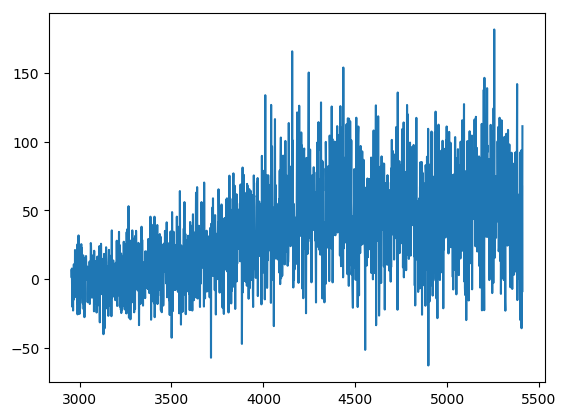

In [43]:
plt.clf()
ax = plt.gca()
ax.plot(pypeIt.sobjs[0].optimal['WAVE'], pypeIt.sobjs[0].optimal['COUNTS'])
plt.show()